In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
data=pd.read_csv(r"C:\ML\laptop_data_cleaned.csv")

In [3]:
data.head(5)
#ppi-pixel_per_inch,ssd-solidStateDrive
#ips-inplane_switching,hdd-hardDiscDrive

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [6]:
data.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
list[data["Company"]]

list[0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1268      Asus
1269    Lenovo
1270    Lenovo
1271    Lenovo
1272        HP
Name: Company, Length: 1273, dtype: object]

In [9]:
data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

[]

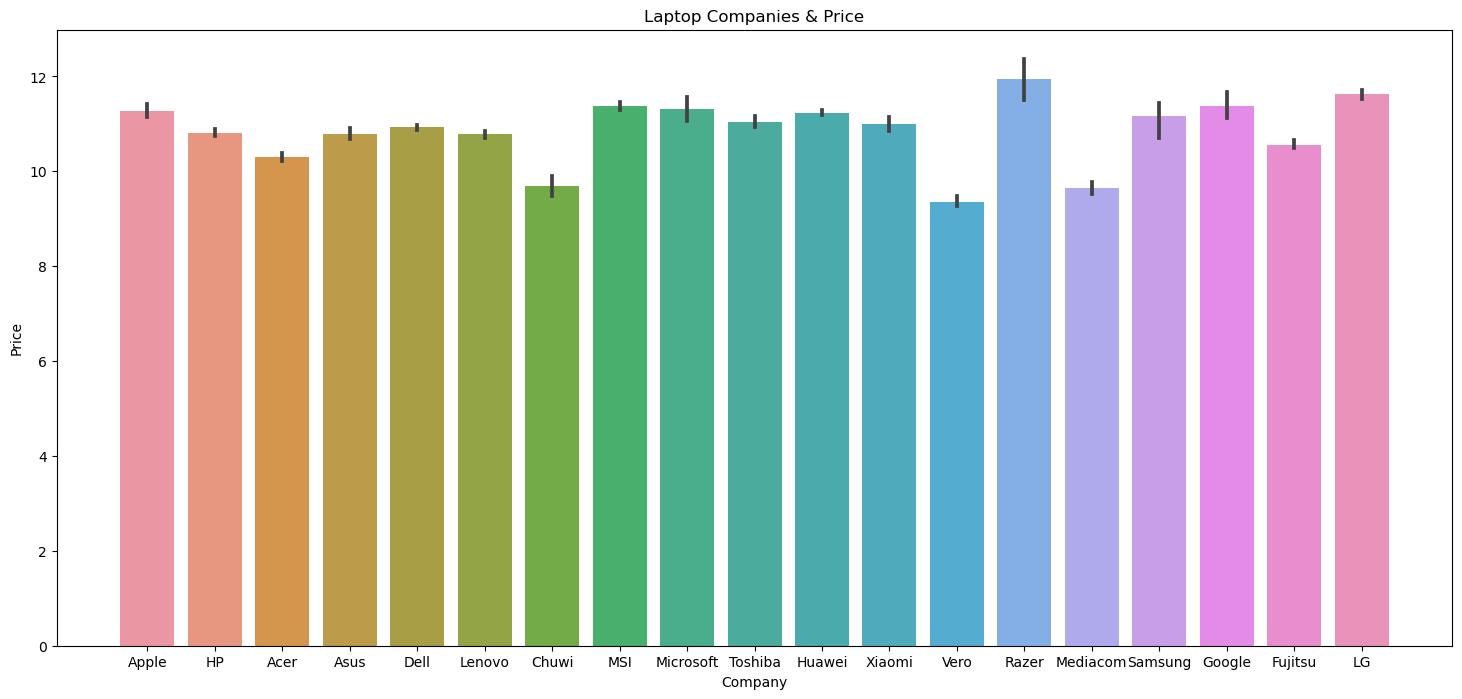

In [10]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies & Price")
sns.barplot(x=data["Company"],y=data["Price"])
plt.plot()

[]

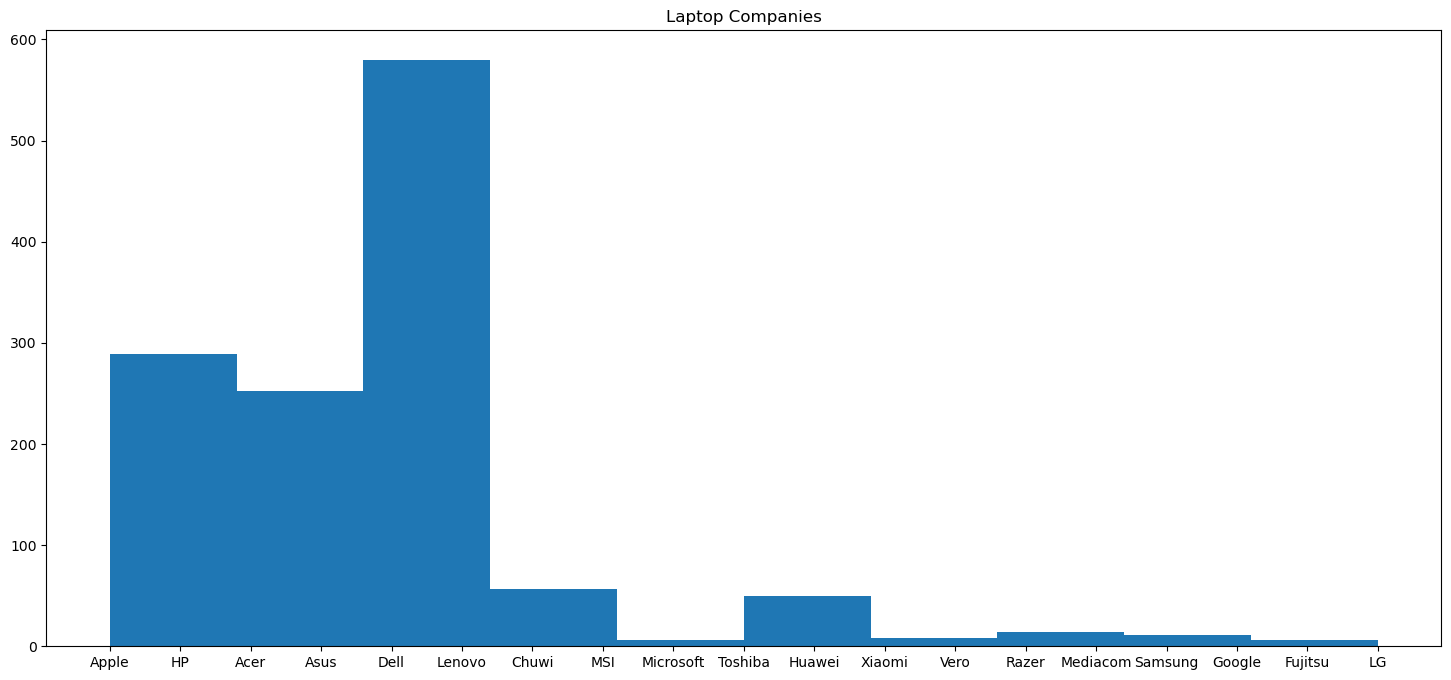

In [11]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies")
plt.hist(x=data["Company"])
plt.plot()

[]

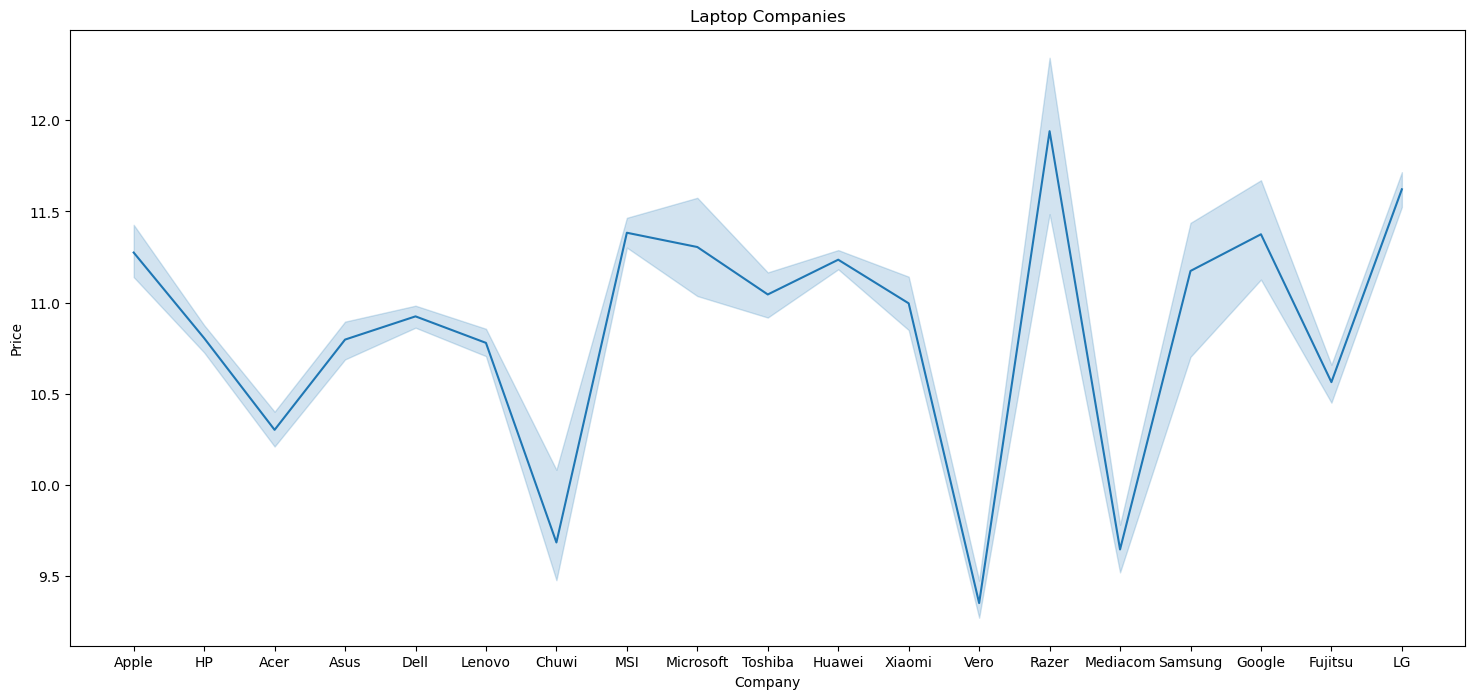

In [12]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies")
sns.lineplot(x=data["Company"],y=data["Price"])
plt.plot()

[]

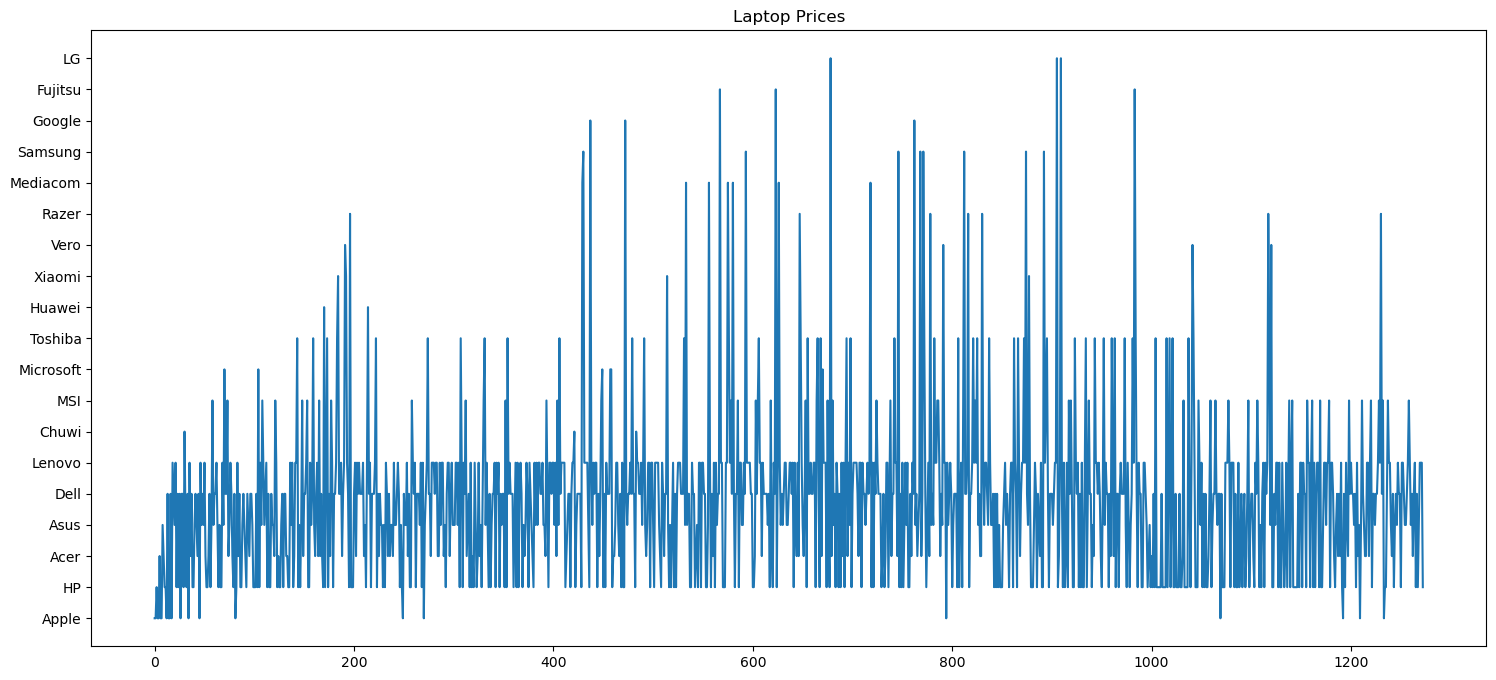

In [13]:
plt.figure(figsize=(18,8))
plt.title("Laptop Prices")
plt.plot(data["Company"])
plt.plot()

In [14]:
def split_data(model):
    part=model.split(" ")
    suffix=part[-1]
    return suffix
data["brand"]=data["Cpu_brand"].apply(lambda x:pd.Series(split_data(x)))

In [15]:
data.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,brand
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,i5
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,i5
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,i5
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,i7
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,i5


In [16]:
data1=data.drop("Cpu_brand",axis=1)

In [17]:
data1.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Gpu_brand,Os,brand
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,0,128,Intel,Mac,i5
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,0,0,Intel,Mac,i5
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,0,256,Intel,Others,i5
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,0,512,AMD,Mac,i7
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,0,256,Intel,Mac,i5


In [18]:
data1["Os"].unique()

array(['Mac', 'Others', 'Windows'], dtype=object)

In [19]:
data1=pd.get_dummies(data1,dtype=int)

In [20]:
data1.head(5)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows,brand_Processor,brand_i3,brand_i5,brand_i7
0,8,1.37,11.175755,0,1,226.983005,0,128,0,1,...,0,1,0,1,0,0,0,0,1,0
1,8,1.34,10.776777,0,0,127.677940,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0,...,0,1,0,0,1,0,0,0,1,0
3,16,1.83,11.814476,0,1,220.534624,0,512,0,1,...,1,0,0,1,0,0,0,0,0,1
4,8,1.37,11.473101,0,1,226.983005,0,256,0,1,...,0,1,0,1,0,0,0,0,1,0


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ram                          1273 non-null   int64  
 1   Weight                       1273 non-null   float64
 2   Price                        1273 non-null   float64
 3   TouchScreen                  1273 non-null   int64  
 4   Ips                          1273 non-null   int64  
 5   Ppi                          1273 non-null   float64
 6   HDD                          1273 non-null   int64  
 7   SSD                          1273 non-null   int64  
 8   Company_Acer                 1273 non-null   int32  
 9   Company_Apple                1273 non-null   int32  
 10  Company_Asus                 1273 non-null   int32  
 11  Company_Chuwi                1273 non-null   int32  
 12  Company_Dell                 1273 non-null   int32  
 13  Company_Fujitsu   

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.Linearmodel import LinearRegression
for i in range(100):
    for j in range(10,25):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=)
        reg=LinearRegression()
        re